In [1]:
#!pip install sentence-transformers

In [12]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.decomposition import PCA

'''
Variables: 
---------

corpus : list of documents
embeddings : documents embeddings of size NxM (N : number of documents, M : embedding dimension) 
red_emd : reduced embeddings matrix using dimentionality reduction
k : number of clusters
labels : documents labels
pred : list of clustering predicted clusters 

''';

In [13]:
def dim_red(mat, p):
    '''
    Perform dimensionality reduction

    Input:
    -----
        mat : NxM list 
        p : number of dimensions to keep 
    Output:
    ------
        red_mat : NxP list such that p<<m
    '''
    
    pca = PCA(n_components=p)
    red_mat = pca.fit_transform(mat)
    
    red_mat = mat[:,:p]
    
    return red_mat

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def find_optimal_clusters(data):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss, 'bo-')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.grid(True)
    plt.show()

In [15]:
def clust(mat, k):
    '''
    Perform clustering

    Input:
    -----
        mat : input list 
        k : number of cluster
    Output:
    ------
        pred : list of predicted labels
    '''
    
     # Initialise le modèle KMeans avec k clusters
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    
    # Adapte le modèle aux données et prédit les clusters
    pred = kmeans.fit_predict(mat)
    
    return pred

In [16]:
# import data
ng20 = fetch_20newsgroups(subset='test')

In [17]:
corpus = ng20.data[:2000]

In [18]:
labels = ng20.target[:2000]

In [19]:
k = len(set(labels))

In [20]:
# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

In [21]:
# perform dimentionality reduction
red_emb = dim_red(embeddings, 20)

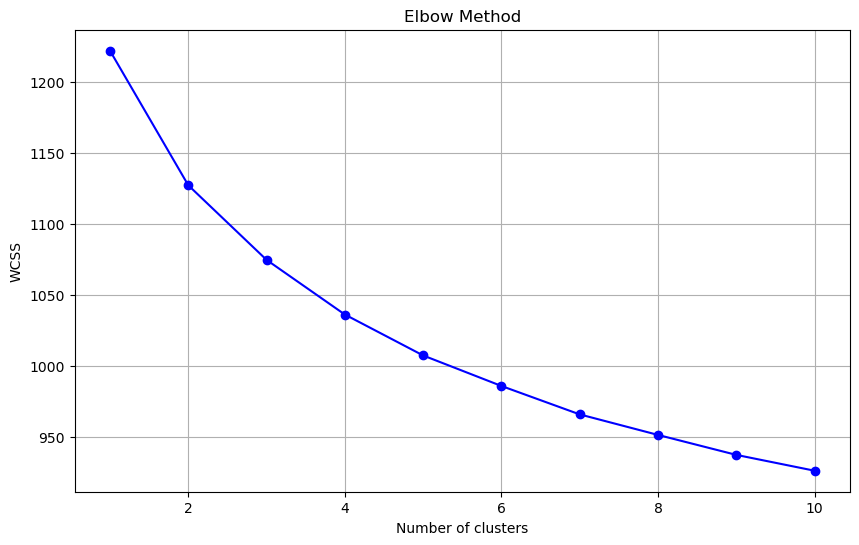

In [23]:
# Trouver le nombre optimal de clusters 
find_optimal_clusters(red_emb)

In [24]:
# perform clustering
pred = clust(red_emb, 3)

In [25]:
# evaluate clustering results
nmi_score = normalized_mutual_info_score(pred,labels)
ari_score = adjusted_rand_score(pred,labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')

NMI: 0.11 
ARI: 0.04
